In [1]:
# import packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Exploratory Data Analysis

## 1 ) Transaction Data 

In [2]:
# Load the data 
transaction = pd.read_excel(r"C:\Users\dell\Downloads\QVI_transaction_data.xlsx")

In [3]:
transaction 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Check dTXN_ID duplicate ID 
transaction.TXN_ID.duplicated().sum()

1709

In [6]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


##### Missing data

In [7]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

- Zero null value in the data provided 

#### STORE_NBR

226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
252       2
206       2
92        1
76        1
Name: STORE_NBR, Length: 272, dtype: int64


<AxesSubplot:title={'center':'THE BEST 10 STORES'}>

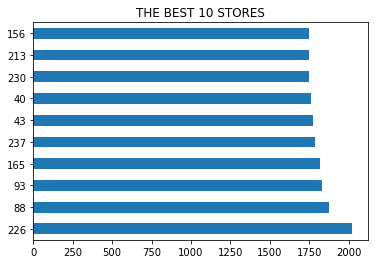

In [8]:
print(transaction["STORE_NBR"].value_counts())
# the best 10 Store Number graph
transaction["STORE_NBR"].value_counts()[:10].plot.barh(title= "THE BEST 10 STORES")

- It can be seen that the *Store* with number **226** is the most frequent store with **2022** times followed by the **Store 88** with **1873** times 

#### PRODUCT_NBR

In [9]:
len(transaction["PROD_NBR"].unique())

114

114 Is the number of the unique stores without dublication 

- There were *114* unique purchased product 

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64


<AxesSubplot:>

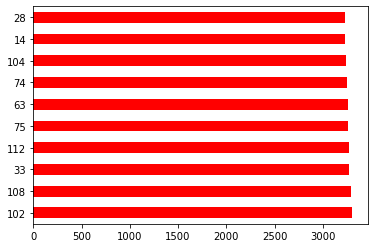

In [10]:
print(transaction["PROD_NBR"].value_counts())
transaction["PROD_NBR"].value_counts()[:10].plot.barh(color = 'r')

The most purchased products are at first **102 108 33 112 75 63 74 104 14 28**  with more than 3000 times 

#### PROD_NBR	PROD_NAME	

In [11]:
prod = pd.Series(transaction.PROD_NBR.unique())  #.nunique()

In [12]:
name=pd.Series(transaction.PROD_NAME.unique())   #.nunique()

In [13]:
ls = []
for x in range(len(prod)):
    y = name[x]
    z = prod[x]
    lst = [y,z]
    ls.append(lst)

print(ls)


[['Natural Chip        Compny SeaSalt175g', 5], ['CCs Nacho Cheese    175g', 66], ['Smiths Crinkle Cut  Chips Chicken 170g', 61], ['Smiths Chip Thinly  S/Cream&Onion 175g', 69], ['Kettle Tortilla ChpsHny&Jlpno Chili 150g', 108], ['Old El Paso Salsa   Dip Tomato Mild 300g', 57], ['Smiths Crinkle Chips Salt & Vinegar 330g', 16], ['Grain Waves         Sweet Chilli 210g', 24], ['Doritos Corn Chip Mexican Jalapeno 150g', 42], ['Grain Waves Sour    Cream&Chives 210G', 52], ['Kettle Sensations   Siracha Lime 150g', 114], ['Twisties Cheese     270g', 15], ['WW Crinkle Cut      Chicken 175g', 92], ['Thins Chips Light&  Tangy 175g', 44], ['CCs Original 175g', 54], ['Burger Rings 220g', 94], ['NCC Sour Cream &    Garden Chives 175g', 98], ['Doritos Corn Chip Southern Chicken 150g', 93], ['Cheezels Cheese Box 125g', 56], ['Smiths Crinkle      Original 330g', 7], ['Infzns Crn Crnchers Tangy Gcamole 110g', 31], ['Kettle Sea Salt     And Vinegar 175g', 32], ['Smiths Chip Thinly  Cut Original 175g', 1

In [14]:
len(ls)

114

All the work above was done to ensure that each product and the 

#### TOT_SALE Distribution 

In [15]:
transaction.TOT_SALES.describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [16]:
# Removing Outliers 

def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

[6.  6.3 2.9 ... 8.8 7.8 8.8]


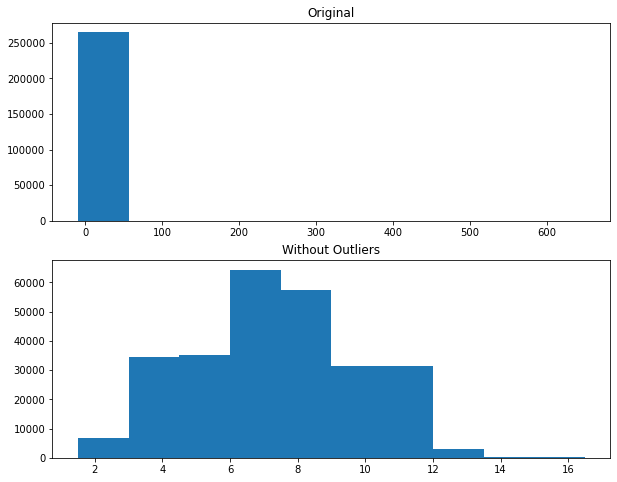

In [17]:
# The function above... In my case it's in a local utilities module


# Generate some data
x = transaction['TOT_SALES']

# Append a few "bad" points
x = np.r_[x, -3, -10, 100]

# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
filtered = x[~is_outlier(x)]
print(filtered)
# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize= (10,8))

ax1.hist(x)
ax1.set_title('Original')

ax2.hist(filtered)
ax2.set_title('Without Outliers')

plt.show()

In the graph above we can see how outliers effect our Data and the analysis, which means We should be aware about Outliers in each case 

#### ROD_NBR	 with PROD_QTY	

In [18]:
group_PROD_NBR = transaction[['PROD_NBR','PROD_QTY']]
grouped_PROD = group_PROD_NBR.groupby(['PROD_NBR']).sum()
grouped_PROD.sort_values(['PROD_QTY'],ascending=False)[:10]

,PROD_QTY
PROD_NBR,
4,6509
102,6381
108,6309
75,6277
33,6256
74,6234
112,6227
63,6212
104,6206


array([<AxesSubplot:ylabel='PROD_QTY'>], dtype=object)

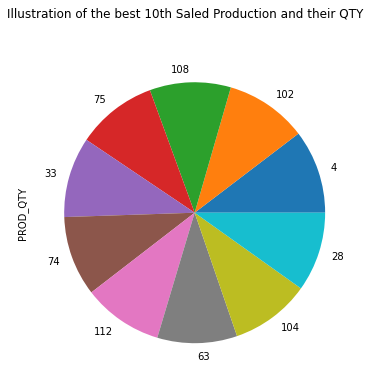

In [19]:
group_PROD_NBR = transaction[['PROD_NBR','PROD_QTY']]
grouped_PROD = group_PROD_NBR.groupby(['PROD_NBR']).sum()
grouped_PROD.sort_values(['PROD_QTY'],ascending=False)[:10].plot(kind = "pie", subplots= True,figsize = (6,6),legend = False
                                                                ,title = "Illustration of the best 10th Saled Production and their QTY  ")

#### ROD_NBR, PROD_QTY and TOT_SALES

In [20]:
group_PROD_NBR_SALES = transaction[['PROD_NBR','PROD_QTY','TOT_SALES']]
grouped_PROD_SALES = group_PROD_NBR_SALES.groupby(['PROD_NBR']).sum()
grouped_PROD_SALES.sort_values(['TOT_SALES'],ascending=False)[:10]

,PROD_QTY,TOT_SALES
PROD_NBR,,
4,6509,40352.0
14,6164,36367.6
16,6106,34804.2
102,6381,34457.4
7,6018,34302.6
23,6017,34296.9
20,5858,33390.6
89,6120,33031.8
46,6064,32740.2


#### Detecting outliers 

- 1_ PROD_QTY

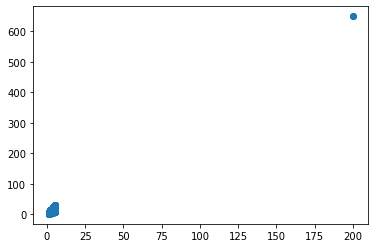

In [21]:
#boxplot
plt.scatter(transaction["PROD_QTY"],transaction["TOT_SALES"])


- It can be seen that the data contains outliers and the scatter plot above illustrates that the PROD_QTY with 200 is an outlier value, but style rough to decide if we can drop it or not 

## 2) Purchase_behaviour

This part is specified to analyse the second dataset of **purchased_behaviour**

In [22]:
purchase_behaviour = pd.read_csv(r"C:\Users\dell\Downloads\QVI_purchase_behaviour.csv")
purchase_behaviour.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [23]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
# Check duplicate card numbers 
purchase_behaviour.LYLTY_CARD_NBR.duplicated().sum()

0

In [25]:
# Missing Values 
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- ZERO missing values 

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


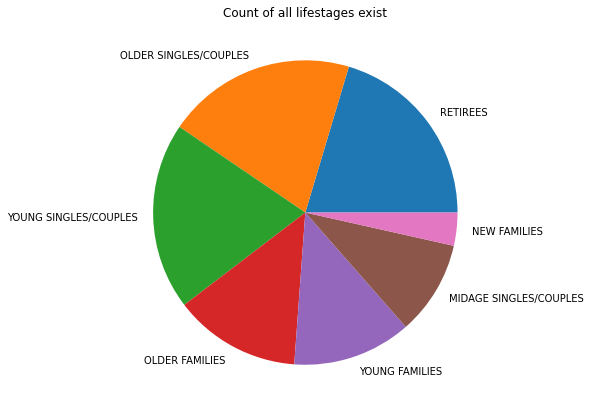

In [26]:
print(purchase_behaviour['LIFESTAGE'].value_counts())
purchase_behaviour['LIFESTAGE'].value_counts().plot.pie(figsize=(7,7),title = "Count of all lifestages exist",legend = False,
                                                       ylabel = "");

- obvious that LIFESTAGE contains 7 classes

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


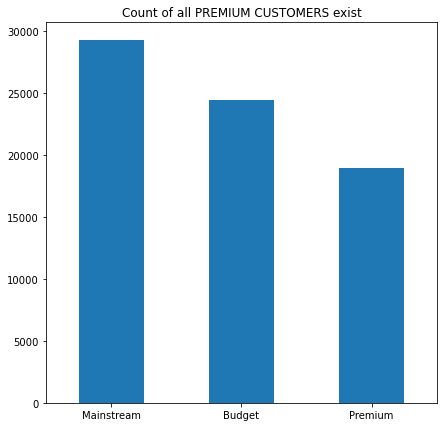

In [27]:
# PREMIUM_CUSTOMER
print(purchase_behaviour['PREMIUM_CUSTOMER'].value_counts())
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts().plot.bar(figsize=(7,7),title = "Count of all PREMIUM CUSTOMERS exist",legend = False,
                                                       ylabel = "",rot = 0);

Depending on the illustration above of the bar graph Mainstream has the high amount with 29245 purhasing time fllowed by Budget and Premium with 24470  and 18922 respectively 

<AxesSubplot:ylabel='LIFESTAGE'>

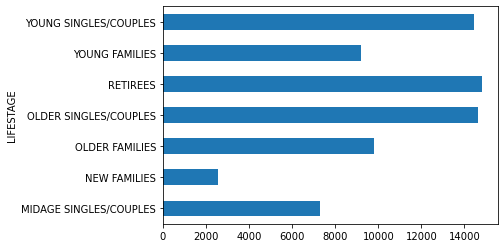

In [28]:
(purchase_behaviour[['LIFESTAGE','PREMIUM_CUSTOMER']].groupby('LIFESTAGE').count()).plot.barh(legend = False)

In [29]:
purchase_behaviour[['LIFESTAGE','PREMIUM_CUSTOMER']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PREMIUM_CUSTOMER'].count()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    1504
                  NEW FAMILIES              1112
                  OLDER FAMILIES            4675
                  OLDER SINGLES/COUPLES     4929
                  RETIREES                  4454
                  YOUNG FAMILIES            4017
                  YOUNG SINGLES/COUPLES     3779
Mainstream        MIDAGE SINGLES/COUPLES    3340
                  NEW FAMILIES               849
                  OLDER FAMILIES            2831
                  OLDER SINGLES/COUPLES     4930
                  RETIREES                  6479
                  YOUNG FAMILIES            2728
                  YOUNG SINGLES/COUPLES     8088
Premium           MIDAGE SINGLES/COUPLES    2431
                  NEW FAMILIES               588
                  OLDER FAMILIES            2274
                  OLDER SINGLES/COUPLES     4750
                  RETIREES                  3872
                  YOUNG FAMI

In [30]:
# insatallation to Save the notebook on PDF format 
#! pip install nbconvert

In [31]:
! pip install nbconvert

! pip install pyppeteer